In [13]:
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4
import numpy as np
from mpl_toolkits.basemap import Basemap

In [2]:
fp='amip_hist.nc'
nc = netCDF4.Dataset(fp)
plt.show()
print(nc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: GMMIP
    branch_method: no parent
    branch_time_in_child: 0.0
    branch_time_in_parent: 0.0
    comment: This experiment starts from January 1870 to December 2014 under the evolving, externally imposed forcings and boundary conditions downloaded from CMIP6 websites. The initial status is from year 25 of a control run under the observed forcing at 1870.
    contact: Dr. Tongwen Wu(twwu@cma.gov.cn)
    creation_date: 2019-06-06T01:29:33Z
    data_specs_version: 01.00.27
    description: GMMIP:amip-hist
    experiment: AMIP-style simulation covering the period 1870-2014
    experiment_id: amip-hist
    external_variables: areacella
    forcing_index: 1
    frequency: mon
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.BCC.BCC-CSM2-MR.amip-hist.none.r1i1p1f1
    grid: T106
    grid_label: gn
    history: 2019-06-06T01:29:32Z ; CMO

In [3]:
print(nc.__dict__)

{'Conventions': 'CF-1.7 CMIP-6.2', 'activity_id': 'GMMIP', 'branch_method': 'no parent', 'branch_time_in_child': 0.0, 'branch_time_in_parent': 0.0, 'comment': 'This experiment starts from January 1870 to December 2014 under the evolving, externally imposed forcings and boundary conditions downloaded from CMIP6 websites. The initial status is from year 25 of a control run under the observed forcing at 1870.', 'contact': 'Dr. Tongwen Wu(twwu@cma.gov.cn)', 'creation_date': '2019-06-06T01:29:33Z', 'data_specs_version': '01.00.27', 'description': 'GMMIP:amip-hist', 'experiment': 'AMIP-style simulation covering the period 1870-2014', 'experiment_id': 'amip-hist', 'external_variables': 'areacella', 'forcing_index': 1, 'frequency': 'mon', 'further_info_url': 'https://furtherinfo.es-doc.org/CMIP6.BCC.BCC-CSM2-MR.amip-hist.none.r1i1p1f1', 'grid': 'T106', 'grid_label': 'gn', 'history': '2019-06-06T01:29:32Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.', 'init

In [4]:
for dim in nc.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1740
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 160
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 320
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2


In [5]:
for var in nc.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1870-01-01
    calendar: 365_day
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (1740,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (1740, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    bounds: lat_bnds
    units: degrees_north
    axis: Y
    long_name: latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (160,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (160, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    bounds: lon_bnds
   

In [107]:
lat = nc['lat'][:]
lon = nc['lon'][:]
rlutcs_var=nc['rlutcs'][0,:,:]
rlutcs_units=nc['rlutcs'].units
#time_var = nc['time'][:]
#time_units = nc['time'].units
#dtime = netCDF4.num2date(time_var[:],time_units)
print(rlutcs_units)

W m-2


In [108]:
print (lon.min(),lon.max())

0.0 358.875


In [109]:
print (lat.min(),lat.max())

-89.1415194264611 89.1415194264611


In [110]:
lon_0 = lon.mean()
lat_0 = lat.mean()
m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [111]:
lon, lat = np.meshgrid(lon, lat)
xi, yi = m(lon, lat)

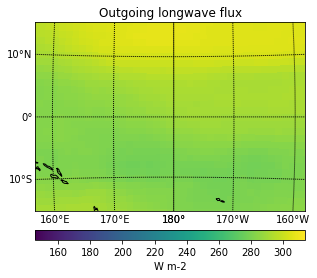

In [113]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(rlutcs_var))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(rlutcs_units)

# Add Title
plt.title('Outgoing longwave flux')

plt.show()